In [1]:
import cedalion
import cedalion.nirs
import cedalion.datasets
import cedalion.plots
import xarray as xr
import matplotlib.pyplot as plt
from cedalion import Quantity, units
import cedalion.sim.synthetic_utils as syn_utils



xr.set_options(display_expand_data=False);

In [2]:
rec = cedalion.datasets.get_nn22_resting_state()
od = cedalion.nirs.int2od(rec["amp"])
print("max time: ", od.time[-1].values)

max time:  368.12624999999997


/home/thomas/anaconda3/envs/cedalion/lib/python3.11/site-packages/pint/facets/numpy/numpy_func.py:322: RuntimeWarning: divide by zero encountered in log
  result_magnitude = func(*stripped_args, **stripped_kwargs)


In [3]:
def plot_stims(df):
    # plot time axis with peaks at onset + duration of stims
    fig, ax = plt.subplots()
    for row in df.iterrows():
        if row[1].trial_type == "Stim 1":
            ax.axvline(row[1].onset, color="blue", linestyle="-")
            ax.axvline(row[1].onset + row[1].duration, color="blue", linestyle="--")
        else:
            ax.axvline(row[1].onset, color="red", linestyle="-")
            ax.axvline(row[1].onset + row[1].duration, color="red", linestyle="--")
    ax.set_xlabel("Time [s]")
    plt.show()

    display(df)

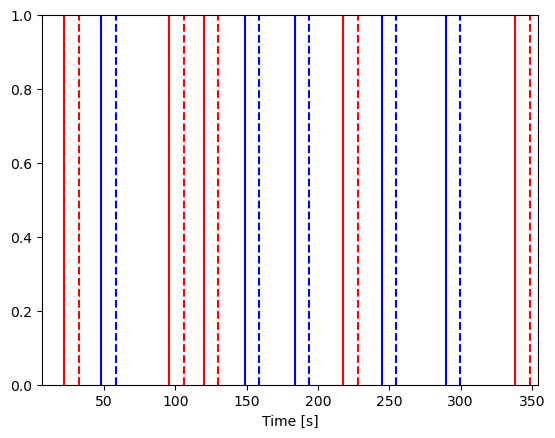

,onset,duration,value,trial_type
0,22.299501,10.0,1.0,Stim 2
1,48.250852,10.0,1.0,Stim 1
2,95.886731,10.0,1.0,Stim 2
3,120.191792,10.0,1.0,Stim 2
4,148.561289,10.0,1.0,Stim 1
5,183.965953,10.0,1.0,Stim 1
6,217.731436,10.0,1.0,Stim 2
7,244.554722,10.0,1.0,Stim 1
8,289.468537,10.0,1.0,Stim 1
9,338.247015,10.0,1.0,Stim 2


In [4]:
stim_df = syn_utils.build_event_df(
    time_axis=od.time,
    trial_types=["Stim 1", "Stim 2"],
    num_events=10,
    order='random balanced',
    min_interval=10 * units.s,
)

plot_stims(stim_df)

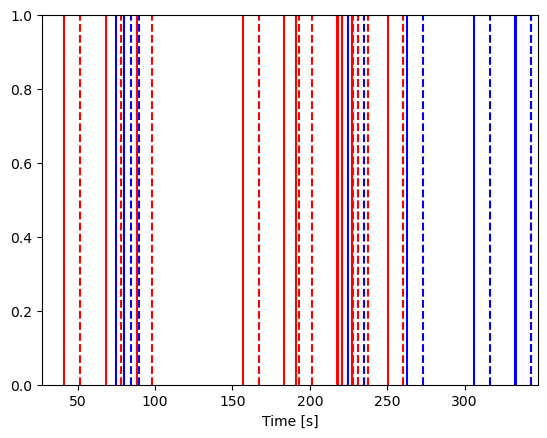

,onset,duration,value,trial_type,channel
0,41.427800,10.0,1.0,Stim 2,"[S10D87, S10D94, S10D89]"
1,68.063025,10.0,1.0,Stim 2,"[S10D87, S10D94, S10D89]"
2,74.691515,10.0,1.0,Stim 1,"[S10D87, S10D94, S10D89]"
3,79.812892,10.0,1.0,Stim 1,"[S10D87, S10D94, S10D89]"
4,88.035069,10.0,1.0,Stim 2,"[S10D87, S10D94, S10D89]"
5,157.091625,10.0,1.0,Stim 2,"[S10D87, S10D94, S10D89]"
6,182.982024,10.0,1.0,Stim 2,"[S10D87, S10D94, S10D89]"
7,191.265158,10.0,1.0,Stim 2,"[S10D87, S10D94, S10D89]"
8,217.394416,10.0,1.0,Stim 2,"[S10D87, S10D94, S10D89]"
9,217.835740,10.0,1.0,Stim 2,"[S10D87, S10D94, S10D89]"


In [5]:
stim_df = syn_utils.build_event_df(
    time_axis=od.time,
    trial_types=["Stim 1", "Stim 2"],
    perc_events=0.5,
    order='random',
    min_interval=None,
    channels=od.channel.values[:3]
)

plot_stims(stim_df)

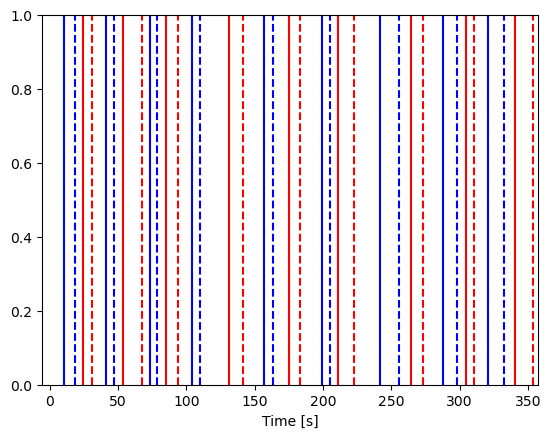

,onset,duration,value,trial_type
0,10.683889,7.978223,0.633331,Stim 1
1,24.471272,6.074713,0.803086,Stim 2
2,41.018426,5.743154,0.966796,Stim 1
3,53.390937,13.973870,0.695845,Stim 2
4,73.505794,5.110877,0.988411,Stim 1
5,84.951845,8.915916,0.834777,Stim 2
6,104.228551,5.709054,0.972397,Stim 1
7,131.427856,9.700363,0.663226,Stim 2
8,156.551780,7.139290,0.973890,Stim 1
9,175.076205,8.379270,0.785292,Stim 2


In [7]:
stim_df = syn_utils.build_event_df(
    time_axis=od.time,
    trial_types=["Stim 1", "Stim 2"],
    num_events=10,
    perc_events=0.66,
    min_dur=5 * units.s,
    max_dur=15 * units.s,
    min_interval=5 * units.s,
    min_value=0.5,
    max_value=1.0,
    order='alternating',
)

plot_stims(stim_df)